#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#### Load the dataset

In [2]:
# Load the dataset
url = "auto-mpg.csv"  # Replace with your CSV file path
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=',', skipinitialspace=True)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, mpg to 31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MPG           399 non-null    object
 1   Cylinders     399 non-null    object
 2   Displacement  393 non-null    object
 3   Horsepower    399 non-null    object
 4   Weight        399 non-null    object
 5   Acceleration  399 non-null    object
 6   Model Year    399 non-null    object
 7   Origin        399 non-null    object
dtypes: object(8)
memory usage: 28.1+ KB


In [4]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,399,399,393,399,399,399,399,399
unique,6,83,94,352,96,14,4,306
top,4,97,150,1985,14.5,73,1,ford pinto
freq,204,21,22,4,23,40,249,6


In [5]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11,70,1,plymouth satellite
16,8,304,150,3433,12,70,1,amc rebel sst


#### Data Pre processing 

In [6]:
# Drop rows with missing values
dataset = dataset.dropna()

# Convert columns to appropriate numeric data types
for column in ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Check for NaN values in the dataset
print("NaN values before dropping: \n", dataset.isnull().sum())

# Drop any rows with NaN values
dataset = dataset.dropna()

# Check again for NaN values to confirm
print("NaN values after dropping: \n", dataset.isnull().sum())

# Convert 'Origin' to string for one-hot encoding
dataset['Origin'] = dataset['Origin'].astype(str)

# Convert categorical 'Origin' column to one-hot encoding
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

NaN values before dropping: 
 MPG             1
Cylinders       1
Displacement    1
Horsepower      1
Weight          1
Acceleration    1
Model Year      1
Origin          0
dtype: int64
NaN values after dropping: 
 MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


#### Train test Split 

In [7]:
# Split the dataset into training and testing sets
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separate features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [8]:
# Check for NaN values in the dataset
assert not train_features.isnull().any().any(), "There are NaN values in the training features"
assert not test_features.isnull().any().any(), "There are NaN values in the test features"
assert not train_labels.isnull().any(), "There are NaN values in the training labels"
assert not test_labels.isnull().any(), "There are NaN values in the test labels"


#### Normalize Features

In [9]:
# Normalize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

#### Define the Model Architecture

In [10]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=[train_features.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

model = build_model()


#### Compile the Model

In [11]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])


#### Train the Model

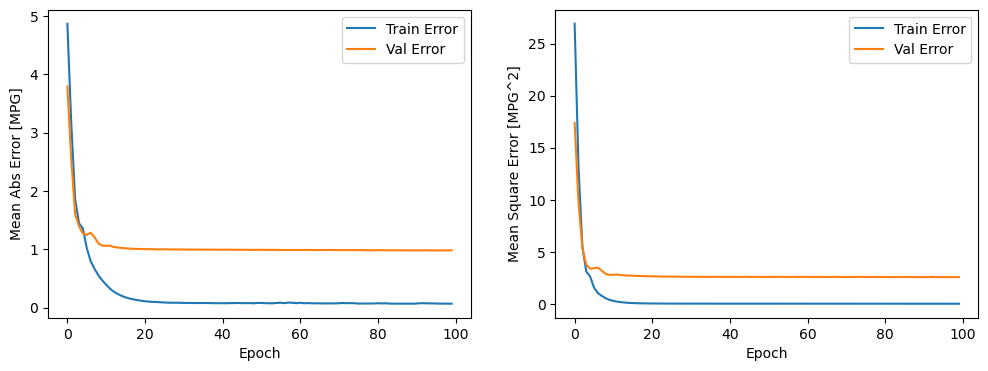

In [12]:
history = model.fit(train_features, train_labels, 
                    epochs=100, validation_split=0.2, verbose=0)

# Plot training history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [MPG^2]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
plt.legend()

plt.show()


#### Evaluate the Model

In [13]:
test_loss, test_mae, test_mse = model.evaluate(test_features, test_labels, verbose=2)
print(f'\nTest MAE: {test_mae:.2f} MPG')


3/3 - 0s - loss: 5.7426 - mae: 1.9889 - mse: 5.7426 - 52ms/epoch - 17ms/step

Test MAE: 1.99 MPG


#### Make Predictions

3/3 [==============================] - 0s 3ms/step


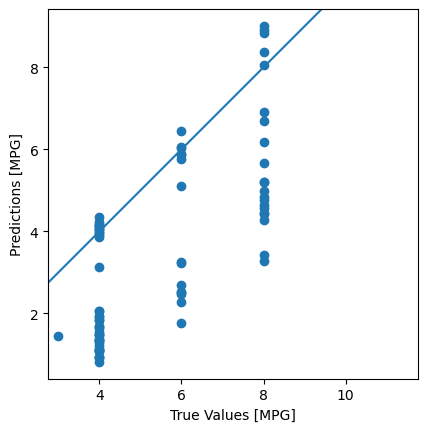

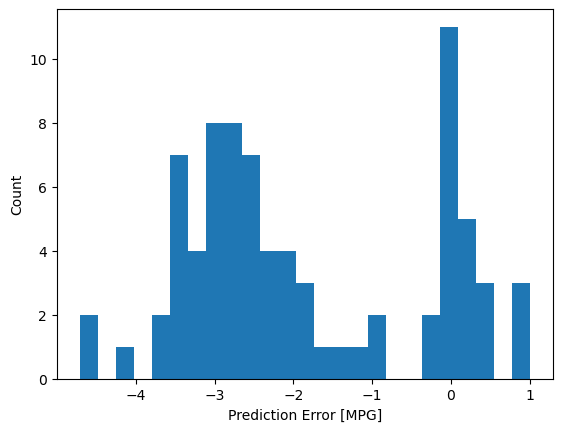

In [14]:
test_predictions = model.predict(test_features).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')
plt.show()


In [15]:
# Print predicted vs actual values
print("\nPredicted vs Actual MPG values:")
for predicted, actual in zip(test_predictions, test_labels):
    print(f"Predicted: {predicted:.2f}, Actual: {actual:.2f}")


Predicted vs Actual MPG values:
Predicted: 1.33, Actual: 4.00
Predicted: 1.69, Actual: 4.00
Predicted: 4.12, Actual: 4.00
Predicted: 1.36, Actual: 4.00
Predicted: 1.94, Actual: 4.00
Predicted: 4.14, Actual: 4.00
Predicted: 8.92, Actual: 8.00
Predicted: 0.91, Actual: 4.00
Predicted: 2.69, Actual: 6.00
Predicted: 1.09, Actual: 4.00
Predicted: 6.17, Actual: 8.00
Predicted: 5.75, Actual: 6.00
Predicted: 4.98, Actual: 8.00
Predicted: 4.17, Actual: 4.00
Predicted: 2.53, Actual: 6.00
Predicted: 1.36, Actual: 4.00
Predicted: 6.02, Actual: 6.00
Predicted: 4.09, Actual: 4.00
Predicted: 1.85, Actual: 4.00
Predicted: 1.47, Actual: 4.00
Predicted: 6.06, Actual: 6.00
Predicted: 0.94, Actual: 4.00
Predicted: 0.93, Actual: 4.00
Predicted: 4.65, Actual: 8.00
Predicted: 3.91, Actual: 4.00
Predicted: 1.65, Actual: 4.00
Predicted: 1.55, Actual: 4.00
Predicted: 3.23, Actual: 6.00
Predicted: 1.14, Actual: 4.00
Predicted: 1.47, Actual: 4.00
Predicted: 4.84, Actual: 8.00
Predicted: 5.10, Actual: 6.00
Predict